In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('wine.data', header=None)

In [3]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
X_train_std = sc.fit_transform(X_train)

In [9]:
X_test_std = sc.transform(X_test)

In [10]:
import numpy as np

In [11]:
np.set_printoptions(precision=4)

In [12]:
mean_vecs = []

In [13]:
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [14]:
d = 13

In [15]:
S_W = np.zeros((d, d))

In [16]:
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [17]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [18]:
mean_overall = np.mean(X_train_std, axis=0)

In [19]:
d = 13

In [20]:
S_B = np.zeros((d, d))

In [21]:
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [22]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [23]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [24]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [25]:
print('Eigenvalues in descending order:\n')
for eigen_pair in eigen_pairs:
    print(eigen_pair[0])

Eigenvalues in descending order:

349.617808905994
172.76152218979385
2.902486757115975e-14
2.842170943040401e-14
1.8792598864684247e-14
1.8792598864684247e-14
1.570137094529844e-14
1.570137094529844e-14
6.116988201454594e-15
5.6936028514646926e-15
5.6936028514646926e-15
4.663614910753138e-15
1.3177428408410096e-15


In [26]:
import matplotlib.pyplot as plt

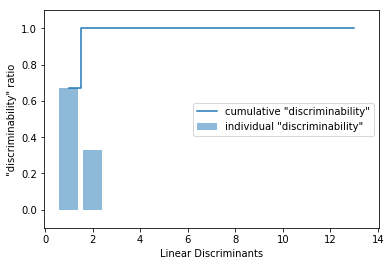

In [27]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [28]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


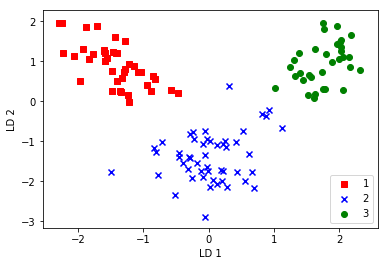

In [29]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1] * (-1), c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()